# Classifying Images of Clothing

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow import keras

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

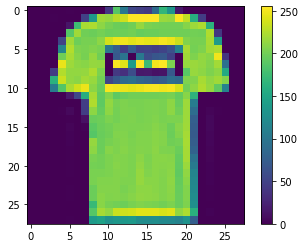

In [9]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

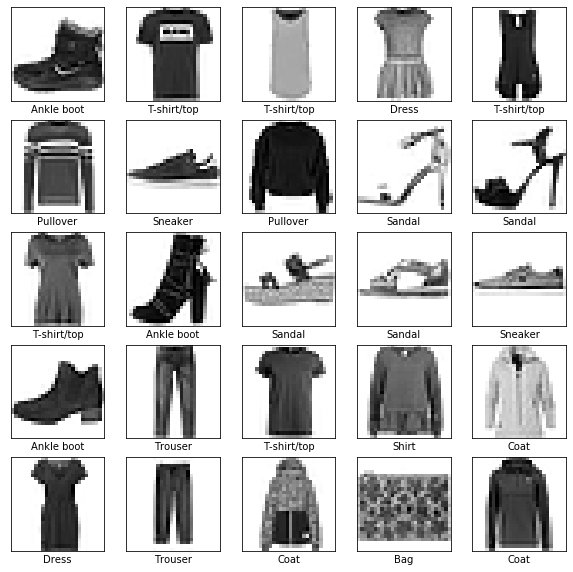

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [24]:
input_layer = tf.keras.layers.Input(shape=(28, 28))
x = tf.keras.layers.Flatten()(input_layer)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(80, activation='relu')(x)
x = tf.keras.layers.Dense(20, activation='relu')(x)
x = tf.keras.layers.Dense(80, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
output_layer = tf.keras.layers.Dense(10)(x)

In [25]:
model = tf.keras.Model(input_layer, output_layer)

In [26]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 80)                10320     
_________________________________________________________________
dense_6 (Dense)              (None, 20)                1620      
_________________________________________________________________
dense_7 (Dense)              (None, 80)                1680      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               1036

In [36]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2481 - accuracy: 0.9066
Epoch 2/20
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2408 - accuracy: 0.9104
Epoch 3/20
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2345 - accuracy: 0.9122
Epoch 4/20
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2250 - accuracy: 0.9160
Epoch 5/20
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2219 - accuracy: 0.9177
Epoch 6/20
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2146 - accuracy: 0.9204
Epoch 7/20
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2098 - accuracy: 0.9215
Epoch 8/20
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2061 - accuracy: 0.9240
Epoch 9/20
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2007 - accuracy: 0.9247
Epoch 10/20
60

In [37]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

10000/1 - 0s - loss: 0.2249 - accuracy: 0.8902

Test accuracy: 0.8902


In [38]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [39]:
predictions[0]

array([2.0419955e-09, 1.2455702e-07, 8.6378842e-13, 6.0578771e-11,
       1.1191565e-12, 1.7170593e-04, 9.7922913e-11, 1.5184004e-03,
       1.7645704e-08, 9.9830973e-01], dtype=float32)

In [40]:
np.argmax(predictions[0])

9

In [41]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

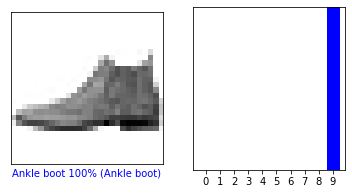

In [42]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

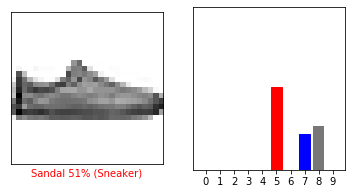

In [43]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

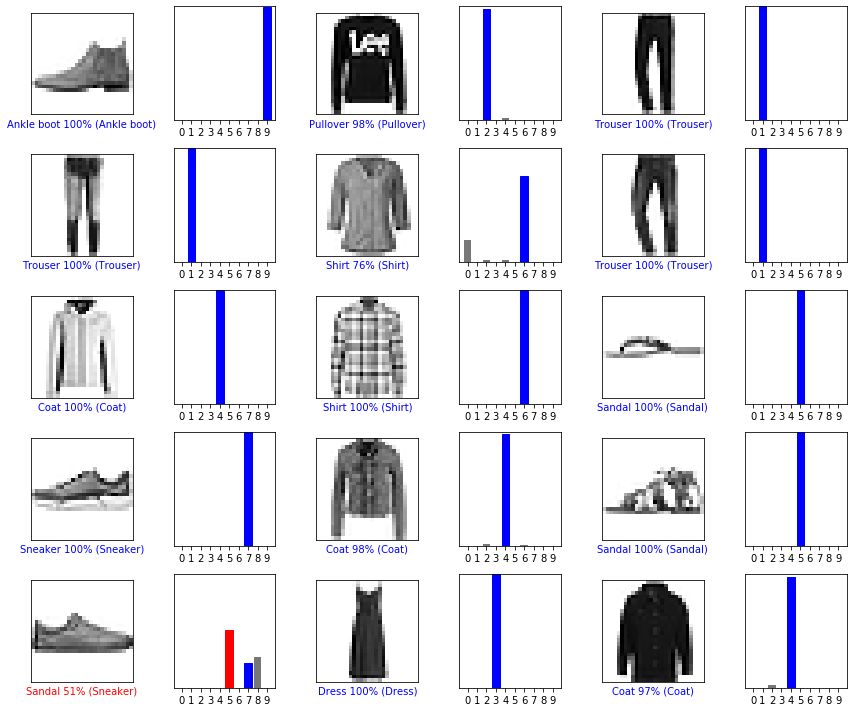

In [44]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()